In [2]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By

import time
import csv
import pandas as pd
import numpy as np

In [33]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )



In [63]:
options = Options()
options.headless = True
driver = webdriver.Firefox(options=options)

traits_all = []

for chelid in log_progress(range(6276,10001)):
    driver.get(f'https://unqnft.io/#/market/token-details?collectionId=25&tokenId={chelid}')
    time.sleep(5)
    element = driver.find_element_by_xpath("/html/body/div[1]/div[1]/main/div/div[2]/div/div/div[2]/div[1]/p")
    traits = element.text.replace("traits: ", "").split(", ")
    
    traits.insert(0, chelid)
    
    with open('traits1.csv', 'a+', newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        wr.writerow(traits)
    
    traits_all.append(traits)  


print("Done!")

driver.quit()



Done!


In [18]:
df = pd.read_csv("traits_new.csv", delimiter=';')
df['Traits'] = df[['Prop1', 'Prop2', 'Prop3', 'Prop4', 'Prop5']].count(axis=1)
df_traits = df.groupby(['Traits']).size().rename('Count').reset_index().sort_values(by=['Count'])
df_traits
#df.sort_values(by=['Traits'])

,Traits,Count
0,0,6
1,1,21
2,2,161
3,3,1318
5,5,3882
4,4,4612


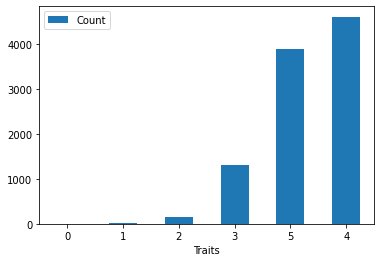

In [19]:
ax = df_traits.plot.bar(x='Traits', y='Count', rot=0)

In [26]:
df2 = pd.concat([df[['Id', 'Prop1', 'Traits']], df[['Id', 'Prop2', 'Traits']].rename(columns={'Prop2': 'Prop1'}),
                df[['Id', 'Prop3', 'Traits']].rename(columns={'Prop3': 'Prop1'}),
                df[['Id', 'Prop4', 'Traits']].rename(columns={'Prop4': 'Prop1'}),
                df[['Id', 'Prop5', 'Traits']].rename(columns={'Prop5': 'Prop1'}),])

df2_traits = df2.groupby(['Prop1']).size().rename('Count').reset_index().sort_values(by=['Count'])
df2_traits

,Prop1,Count
21,Hate Print,168
32,Love Print,484
55,Yellow Parrot Print,591
22,Heart Print,591
50,Unique Blue Logo,593
36,Orange Print,605
11,Blue Parrot Print,607
4,Berry Print,618
6,Black Heart Print,619
49,Unique Black Logo,624


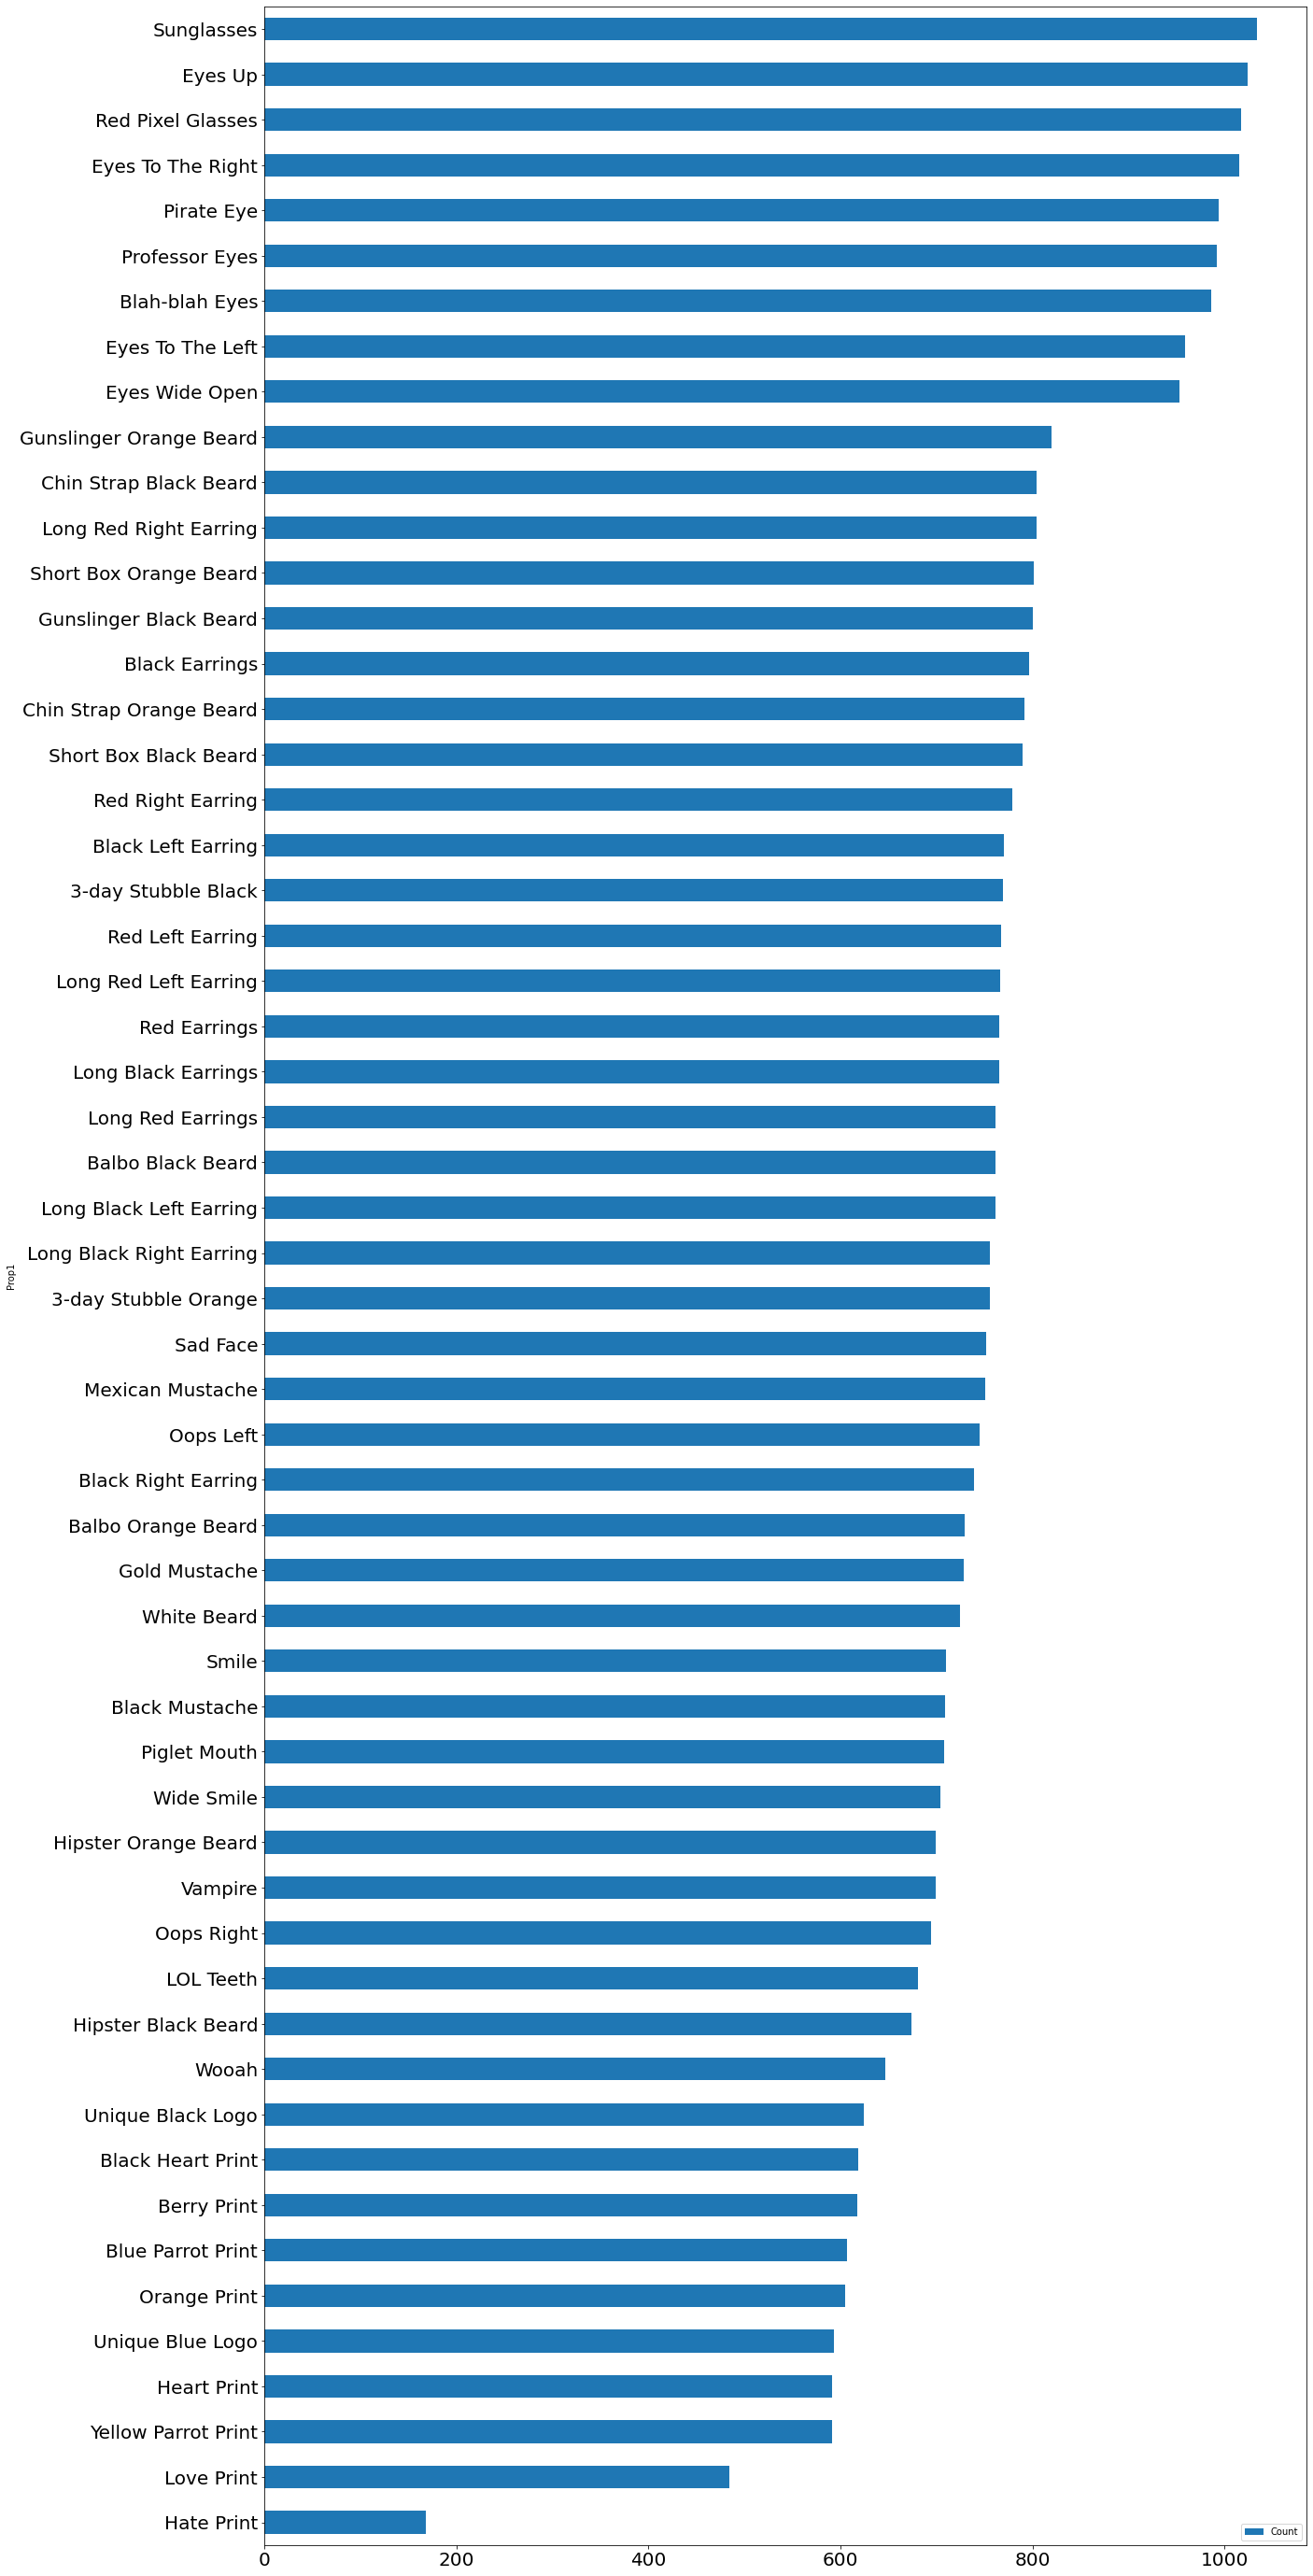

In [38]:
ax = df2_traits.plot.barh(x='Prop1', y='Count', figsize=(20,50), fontsize=20)

In [39]:
table = df2.pivot_table(['Prop1', 'Traits'], index=['Prop1'], columns=['Traits'], aggfunc=np.size, fill_value=0)
table

Id                   
Traits                    1   2    3    4    5
Prop1                                         
3-day Stubble Black       2   5   93  359  310
3-day Stubble Orange      0   4   76  350  326
Balbo Black Beard         0  10   88  327  337
Balbo Orange Beard        0   5   62  339  323
Berry Print               0   1   16  176  425
Black Earrings            0   4   77  345  371
Black Heart Print         0   3   29  129  458
Black Left Earring        1   8   80  373  308
Black Mustache            0  11   90  314  294
Black Right Earring       0   5   80  342  312
Blah-blah Eyes            0   5   97  463  421
Blue Parrot Print         0   0   26  153  428
Chin Strap Black Beard    1   7   78  413  305
Chin Strap Orange Beard   0   5   62  365  360
Eyes To The Left          1  14   90  454  400
Eyes To The Right         0   7  106  461  441
Eyes Up                   0   5   98  473  448
Eyes Wide Open            8  18   85  444  398
Gold Mustache             0   3   74  338  313
Gunslinger Black Beard    1   5   87  359  348
Gunslinger Orange Beard   0   9  103  372  336
Hate Print                0   0    6   45  117
Heart Print               0   0   19  160  412
Hipster Black Beard       0  10   71  318  275
Hipster Orange Beard      0   6   72  321  300
LOL Teeth                 0   4   73  323  281
Long Black Earrings       0  11   80  349  325
Long Black Left Earring   1   2   79  385  295
Long Black Right Earring  0   5   77  358  316
Long Red Earrings         1   8   86  343  324
Long Red Left Earring     0   7   89  350  320
Long Red Right Earring    1   8   81  360  354
Love Print                0   0   13  118  353
Mexican Mustache          0   7   80  340  324
Oops Left                 0   9   77  325  334
Oops Right                0   4   77  329  284
Orange Print              0   2   19  158  426
Piglet Mouth              0   7   71  325  305
Pirate Eye                0   4   84  481  425
Professor Eyes            2   7   94  468  421
Red Earrings              0   3   81  362  319
Red Left Earring          0   1   78  349  339
Red Pixel Glasses         0   8   94  467  448
Red Right Earring         0   5   84  391  299
Sad Face                  0   7   67  379  299
Short Box Black Beard     0   3   82  368  337
Short Box Orange Beard    0  14   89  373  325
Smile                     2  13   68  335  292
Sunglasses                0   7   95  452  480
Unique Black Logo         0   0   23  164  437
Unique Blue Logo          0   1   18  157  417
Vampire                   0   6   90  300  303
White Beard               0   7   78  359  281
Wide Smile                0   5   70  326  303
Wooah                     0   6   65  307  269
Yellow Parrot Print       0   1   27  154  409